In [48]:
import re
import nltk
nltk.download('averaged_perceptron_tagger_eng')
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import pos_tag
from datetime import datetime

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Load spaCy model for lemmatization
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Define Sample Text

In [49]:
text = """My name is Alex, and I work as a Data Scientist. My email is alex.data@email.com.
I was born on 27-March-2000. You can contact me at +1-9876543210. I don't like spam emails!
However, I love Machine Learning & NLP. AI is transforming the world; however, some people
misuse it. Are you attending the AI Summit 2025?"""


Tokenization (Words & Sentences)
 Insight: Breaks text into meaningful units.
 Application: Chatbots, voice assistants, search engines.

In [50]:
words = word_tokenize(text)  # Word Tokenization
sentences = sent_tokenize(text)  # Sentence Tokenization

print(f"Tokenized Words: {words}")
print(f"Tokenized Sentences: {sentences}")


Tokenized Words: ['My', 'name', 'is', 'Alex', ',', 'and', 'I', 'work', 'as', 'a', 'Data', 'Scientist', '.', 'My', 'email', 'is', 'alex.data', '@', 'email.com', '.', 'I', 'was', 'born', 'on', '27-March-2000', '.', 'You', 'can', 'contact', 'me', 'at', '+1-9876543210', '.', 'I', 'do', "n't", 'like', 'spam', 'emails', '!', 'However', ',', 'I', 'love', 'Machine', 'Learning', '&', 'NLP', '.', 'AI', 'is', 'transforming', 'the', 'world', ';', 'however', ',', 'some', 'people', 'misuse', 'it', '.', 'Are', 'you', 'attending', 'the', 'AI', 'Summit', '2025', '?']
Tokenized Sentences: ['My name is Alex, and I work as a Data Scientist.', 'My email is alex.data@email.com.', 'I was born on 27-March-2000.', 'You can contact me at +1-9876543210.', "I don't like spam emails!", 'However, I love Machine Learning & NLP.', 'AI is transforming the world; however, some people\nmisuse it.', 'Are you attending the AI Summit 2025?']


Count Unique Tokens
  Insight: Measures vocabulary richness.
  Application: Plagiarism detection, text complexity analysis.

In [51]:
unique_tokens = set(words)
print(f"Unique Tokens Count: {len(unique_tokens)}")


Unique Tokens Count: 55


Count and Remove Punctuations: Standardizes text for NLP models. Application: Preprocessing for sentiment analysis, spam detection.

In [52]:
punctuation_count = sum(1 for char in text if char in ".,!?;:-")
text_no_punct = re.sub(r'[^\w\s]', '', text)
print(f"Punctuation Count: {punctuation_count}")


Punctuation Count: 17


Stopwords Analysis: Identifies word roles (nouns, verbs, etc.). Application: Grammar checking, machine translation.

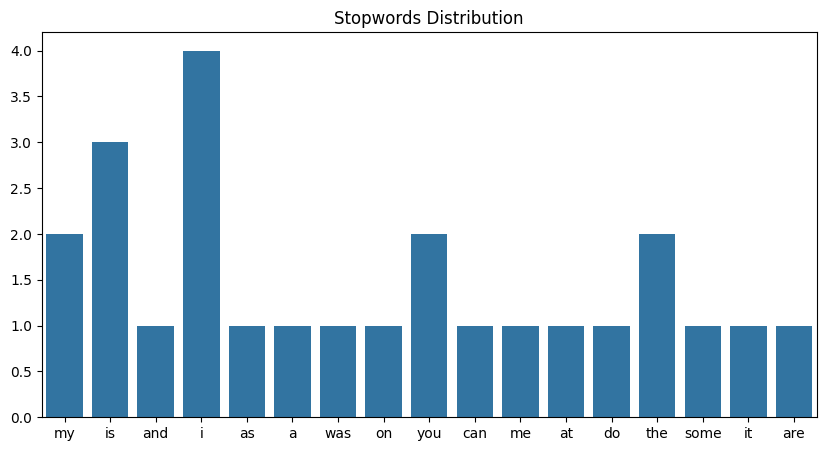

In [53]:
stop_words = set(stopwords.words('english'))
stopword_counts = Counter(word.lower() for word in words if word.lower() in stop_words)

# Plot stopwords distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=list(stopword_counts.keys()), y=list(stopword_counts.values()))
plt.title("Stopwords Distribution")
plt.show()


Remove Stopwords

In [ ]:
filtered_tokens = [word for word in words if word.lower() not in stop_words]
print(f"Filtered Tokens (Without Stopwords): {filtered_tokens}")


Filtered Tokens (Without Stopwords): ['name', 'Alex', ',', 'work', 'Data', 'Scientist', '.', 'email', 'alex.data', '@', 'email.com', '.', 'born', '27-March-2000', '.', 'contact', '+1-9876543210', '.', "n't", 'like', 'spam', 'emails', '!', 'However', ',', 'love', 'Machine', 'Learning', '&', 'NLP', '.', 'AI', 'transforming', 'world', ';', 'however', ',', 'people', 'misuse', '.', 'attending', 'AI', 'Summit', '2025', '?']


POS Tagging & Plot Distribution: Identifies word roles (nouns, verbs, etc.). Application: Grammar checking, machine translation.

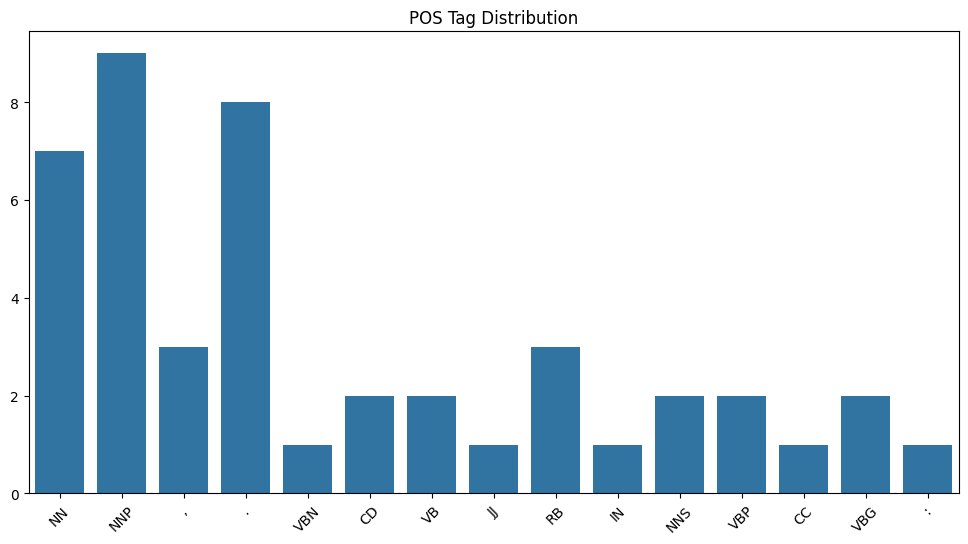

In [ ]:
pos_tags = pos_tag(filtered_tokens)
pos_counts = Counter(tag for word, tag in pos_tags)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(pos_counts.keys()), y=list(pos_counts.values()))
plt.title("POS Tag Distribution")
plt.xticks(rotation=45)
plt.show()


Lemmatization & Count Unique Lemmas: Converts words to base forms for better text analysis. Application: Search engines, chatbots, speech recognition.

In [ ]:
lemmas = [token.lemma_ for token in nlp(" ".join(filtered_tokens))]
unique_lemmas = set(lemmas)
print(f"Unique Lemmas: {len(unique_lemmas)}")


Unique Lemmas: 38


Plot Top 10 Most Frequent Words: Finds most commonly used words. Application: Keyword extraction, content recommendation.

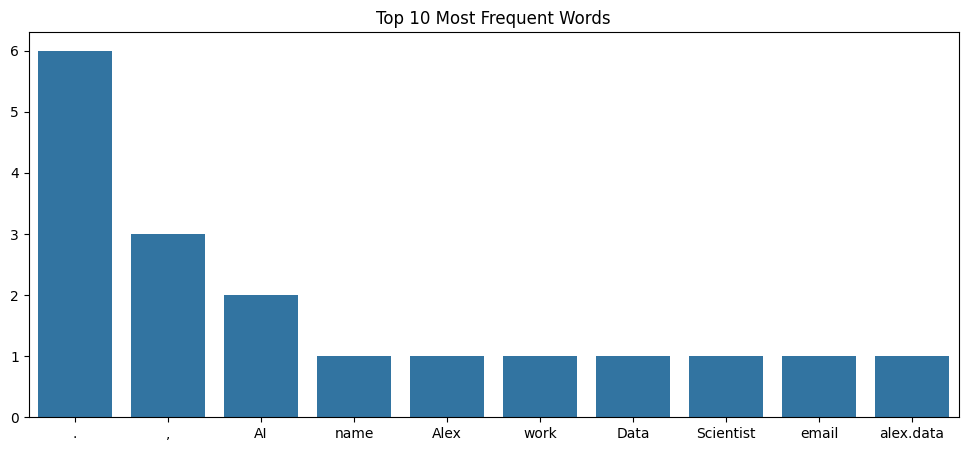

In [ ]:
word_counts = Counter(filtered_tokens)
top_10_words = word_counts.most_common(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=[word[0] for word in top_10_words], y=[word[1] for word in top_10_words])
plt.title("Top 10 Most Frequent Words")
plt.show()


Find Bigrams, Trigrams, and Quadgrams: Captures word sequences for contextual understanding. Application: Auto-suggestions, text prediction.

In [ ]:
bigrams = list(ngrams(filtered_tokens, 2))
trigrams = list(ngrams(filtered_tokens, 3))
quadgrams = list(ngrams(filtered_tokens, 4))

print(f"Unique Bigrams: {len(bigrams)}, Trigrams: {len(trigrams)}, Quadgrams: {len(quadgrams)}")


Unique Bigrams: 44, Trigrams: 43, Quadgrams: 42


Extract & Format Dates:Identifies and standardizes date formats. Application: Event scheduling, timeline analysis.


In [ ]:
date_pattern = r'\b(\d{1,2})[- ](January|February|March|April|May|June|July|August|September|October|November|December)[- ](\d{4})\b'
matches = re.findall(date_pattern, text)

# Convert dates to DD-MM-YYYY format
formatted_dates = [f"{m[0]}-{m[1][:3]}-{m[2]}" for m in matches]
print(f"Formatted Dates: {formatted_dates}")


Formatted Dates: ['27-Mar-2000']


Extract Years and Plot Distribution

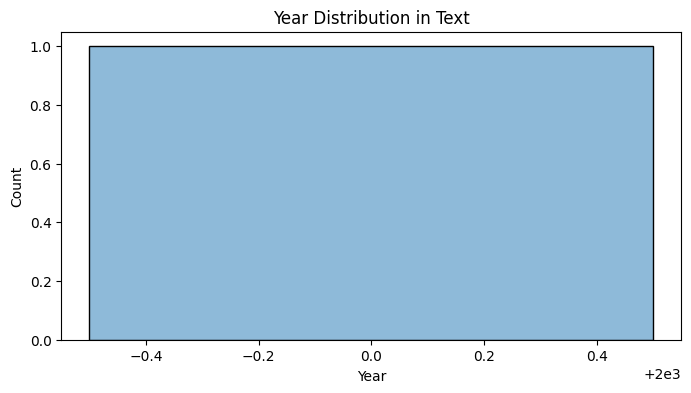

In [ ]:
years = [int(m[2]) for m in matches]

plt.figure(figsize=(8, 4))
sns.histplot(years, bins=len(set(years)), kde=True)
plt.title("Year Distribution in Text")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


Extract & Validate Phone Numbers: Detects valid phone numbers in text. Application: Contact extraction, fraud detection.

In [ ]:
phone_pattern = r'\+?1[-\s]?\d{10}'
valid_phones = re.findall(phone_pattern, text)
print(f"Valid Phone Numbers: {valid_phones}")


Valid Phone Numbers: ['+1-9876543210']
